In [1]:
#anaconda3
import mdtraj as md
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [3]:

#info
#some are united in this analysis 
# H alpha helix
# B residue in isolated beta bridge
# E extended strand in beta ladder
# G 3-helix
# I 5-helix
# T hydrogen bonded turn
# S bend
# '' loops
# NA for not residues (capping molecules) -> removed in next step




In [66]:
def counts(data):
    #create list for each aminoacid
    positions = {i: {'H':0,'B':0,'G':0,'T':0,'S':0,' ':0} for i in range(0, 11)}
    matrix = np.array(data)
    #loop through the positions and count ss for each position
    for pos in range(0,11):
        for row in matrix:
            letter = row[pos]
            if letter == 'B':
                positions[pos]['B'] += 1
            if letter == 'I':
                positions[pos]['G'] += 1
            elif letter == 'E':
                positions[pos]['B'] += 1
            else:
                positions[pos][letter] += 1
            

    #change the position number with the name of the aminoacids
    peptide = ['1A', '2E' ,'3K' ,'4I','5R','6K','7E','8L','9E','10K','11Q']
    positions=dict(zip(peptide,list(positions.values()))) 
    big_array = np.array([list(data_dict.values()) for data_dict in positions.values()])
    return big_array


In [80]:
def plotting(dataframe, err):
    df = pd.DataFrame(dataframe)
    df_e = pd.DataFrame(err)
    t_df = df.transpose()
    t_dfe = df_e.transpose()
    plot = t_df.plot.bar(yerr=t_dfe, width=0.9, linewidth=0.1, figsize = (15, 9),fontsize = 32, legend=None)
    plot.set_ylabel('Frequency', fontsize = 35)
    plot.text(0.5, 1.05, 'DSSP CAHS11aa in 0% TFE starting Disordered', ha='center', fontsize = 35, transform=plot.transAxes, color= "green")
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
    #plot.legend(fontsize = 21, bbox_to_anchor=(0.53, 0.83), ncol = 3)
    for i in range(1, 11):
        y_value = i * 0.1
        plt.axhline(y=y_value, color='gray', alpha=0.2,zorder=0)
    for axis in ['top', 'bottom', 'left', 'right']:
        plot.spines[axis].set_linewidth(2.6)
        plot.spines[axis].set_color('gray')
        plot.spines[axis].set_alpha(0.6)

    return plot




In [90]:
folder_path = 'traj/' # M0: traj // M7: trajM7cahsUnfolded or #trajM7cahsHelix

mean = []

#open files

file_pairs = [(f'mdAlignCG{i}.pdb', f'mdAlignCG{i}.xtc') for i in range(1,7)] #change range into range(1, 7) for just helix M7 or (7,12) for unfolded
#dssp analysis
for pdb_file, xtc_file in file_pairs:
    pdb_path = os.path.join(folder_path, pdb_file)
    xtc_file = os.path.join(folder_path, xtc_file)
    traj = md.load(xtc_file, top=pdb_path)
    dssp_NA = md.compute_dssp(traj, simplified=False)
    dssp = dssp_NA[20000:40001, 1:12]
    counts(dssp)
    mean.append(counts(dssp))



In [91]:
#calculate probability
result = mean
row_sums = np.sum(result, axis=2, keepdims=True)
result = np.where(row_sums, result / row_sums, result)
#The SEM provides an estimate of how much the sample mean is expected to vary from the true population mean.


In [92]:
#mean of the result to continue calculation of error bars
calc_mean = result
sd = result
calc_mean = np.mean(result, axis=0)
sem = np.std(sd, axis=0) / np.sqrt(sd.shape[0])


In [93]:
#generate some lists and dictionaries for later
rowname = ['A1', 'E2' ,'K3' ,'I4','R5','K6','E7','L8','E9','K10','Q11']
colname = ['Alpha-helix ','Beta','3-helix','Turn','Bend','Random']
aa_mean = {rowname[row]: {colname[col]: calc_mean[row][col] for col in range(6)} for row in range(11)}
aa_err = {rowname[row]: {colname[col]: sem[row][col] for col in range(6)} for row in range(11)}


<Axes: ylabel='Frequency'>

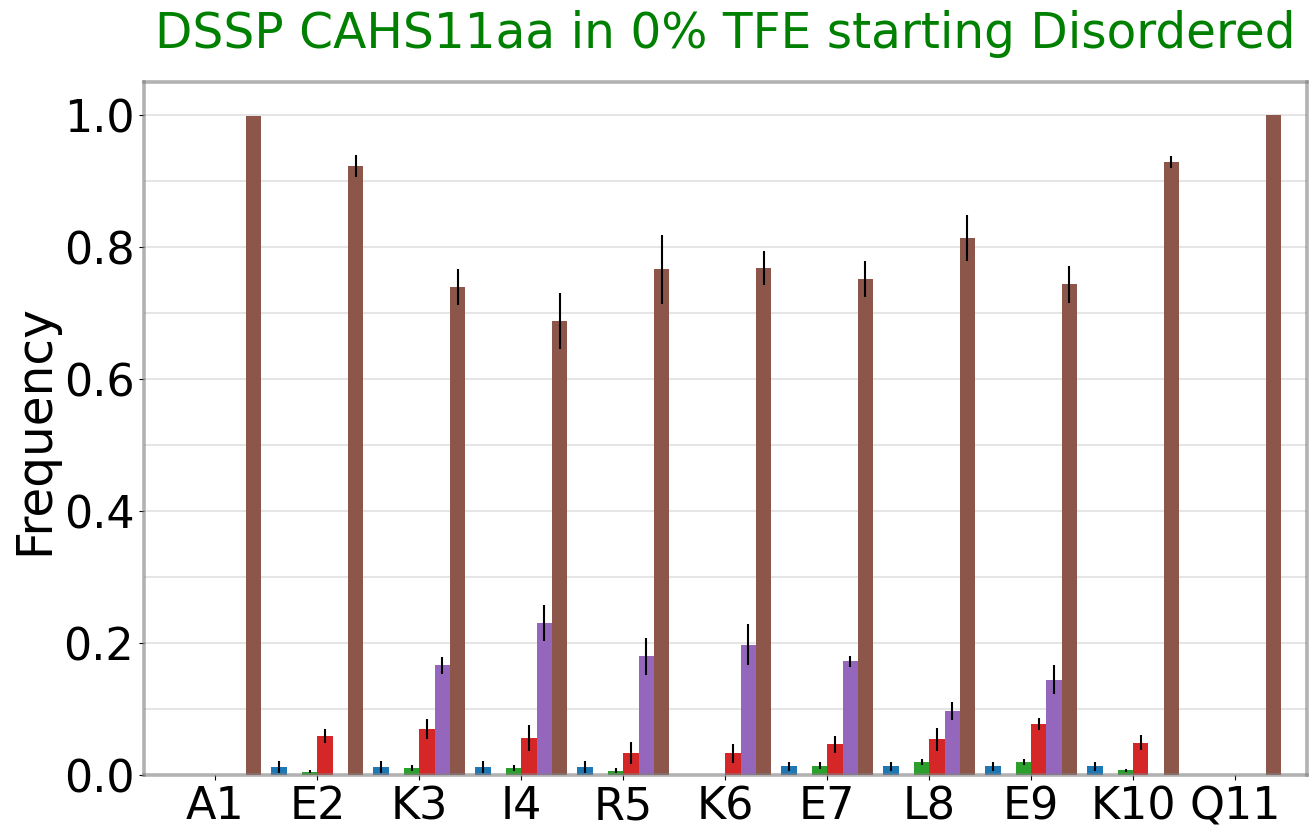

In [85]:
plotting(aa_mean, aa_err)
# H alpha helix
# B residue in isolated beta bridge
# E extended strand in beta ladder
# G 3-helix
# I 5-helix
# T hydrogen bonded turn
# S bend
# '' loops -> becomes L in legend 
# NA for not residues (capping molecules) -> removed in next step


In [1]:
#this is a dumb part of my code, for the sake of time I couldn't optimize it
#calculate for CAHS11aa the values normally, but then you calculate the same for control in the other notebook (dssp_control) and write the results here, and use them. In here you can comment and uncomment based on what you are analyzing

final_dic = {}
error_dic={}
'''this part is for M0'''
# alpha-helix
control={'Alpha-helix ': 0.015731395551535816, 'Beta': 0.009520474999969681, '3-helix': 0.006489028688043933, 'Turn': 0.05284360949659547, 'Bend': 0.15506659130501085, 'Random': 0.7603488999588442}
cotnrol_error = {'Alpha-helix ': 0.0447800092482995, 'Beta': 0.03139743717418883, '3-helix': 0.012365066086854934, 'Turn': 0.06757203326839967, 'Bend': 0.06632967037397094, 'Random': 0.08506206437644982}
# unordered
#control = {'Alpha-helix ': 0.004304844886564625, 'Beta': 0.0076907355424566, '3-helix': 0.0023456884429444037, 'Turn': 0.03165749813709961, 'Bend': 0.18213694477980463, 'Random': 0.7718642882111303}
#control_error = {'Alpha-helix ': 0.011543047022451342, 'Beta': 0.027419866894652232, '3-helix': 0.004319104088294552, 'Turn': 0.032421024804498905, 'Bend': 0.04888453747059872, 'Random': 0.0615598426425266} 

'''this part is for M7'''
# alpha-helix
#control = {'Alpha-helix ': 0.06371309203581416, 'Beta': 0.0005696899354462481, '3-helix': 0.010541786945121034, 'Turn': 0.0331051173946025, 'Bend': 0.17252726345902292, 'Random': 0.7195430502299932}
#control_error = {'Alpha-helix ': 0.24423433304361683, 'Beta': 0.001963496279845052, '3-helix': 0.033750304568157634, 'Turn': 0.053511444721357763, 'Bend': 0.1780345712512965, 'Random': 0.3065499741680048}

# unordered 
#control = {'Alpha-helix ': 0.04780472450056077, 'Beta': 0.00045478811601478623, '3-helix': 0.009966592872227155, 'Turn': 0.04801926315979829, 'Bend': 0.15379972807592387, 'Random': 0.7399549032754752}
#control_error ={'Alpha-helix ': 0.14709343005994713, 'Beta': 0.0008623970707824771, '3-helix': 0.018822185030927016, 'Turn': 0.0737762729509241, 'Bend': 0.08124123208232202, 'Random': 0.18166839509396102}

#calculate DSSP for each aa and group themm based on ss, then calculate frequency and error bars
for key in colname:
    total = sum(aa_mean[item][key] for item in aa_mean)/11
    final_dic[key] = total
    total_err = math.sqrt(sum(aa_err[item][key] ** 2 for item in aa_err))
    error_dic[key] = total_err

print(final_dic)
print(error_dic)
        



NameError: name 'colname' is not defined

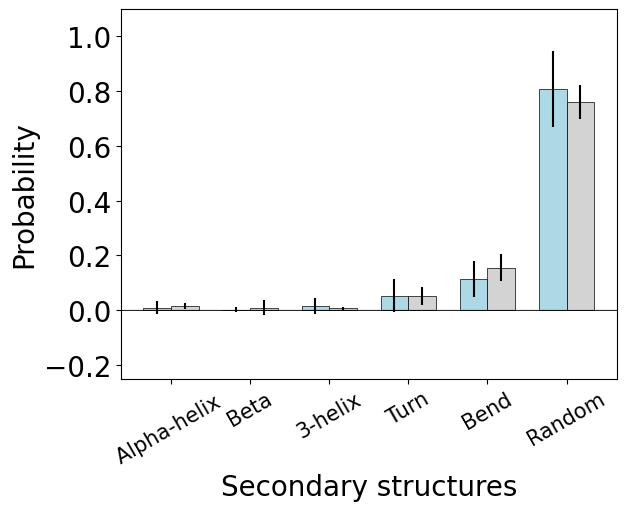

In [96]:
#plotting
keys = list(final_dic.keys())
values1 = list(final_dic.values())
values2 = list(control.values())

errors1 = [error_dic[key] for key in keys]
errors2 = [control_error[key] for key in keys]
bar_width = 0.35
x = range(len(keys))
    #create a bar plot
plt.bar(x, values1, width=bar_width, label='CAHS11aa', yerr=errors1, color = 'lightblue', edgecolor='black', linewidth=0.5)
plt.bar([i + bar_width for i in x], values2, width=bar_width, label='Control', yerr=errors2, color ='lightgrey', edgecolor='black', linewidth=0.5)
plt.axhline(y=-0.00001, color='black', linewidth = 0.1)
plt.axhline(y=0, color='black', linewidth = 0.6)

plt.xticks([i + bar_width / 2 for i in x], keys,fontsize = 15, rotation=30)
plt.ylim(-0.25,1.1)
plt.yticks(fontsize=20)
plt.xlabel('Secondary structures', fontsize = 20)
plt.ylabel('Probability',fontsize = 20)



plt.show()